In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import time
from randomGraph import RandomWeightedGraph

In [2]:
class Node:
    def __init__(self, value):
        self.value = value          # Значення вузла (ідентифікатор)
        self.parent = self          # Спочатку вузол є своїм власним батьком (коренем)
        self.size = 1               # Розмір піддерева, спочатку 1
    
class UnionFind:
    def __init__(self, n):
        # Ініціалізуємо n вузлів
        self.nodes = [Node(i) for i in range(n)]
    
    def find(self, u):
        # Знаходимо корінь для вузла через пошук з компресією шляху
        node = self.nodes[u]
        if node.parent != node:
            node.parent = self.find(node.parent.value)  # Рекурсивно знаходимо корінь і оновлюємо батька
        return node.parent
    
    def union(self, u, v):
        # Знаходимо корені обох вузлів
        root_u = self.find(u)
        root_v = self.find(v)
        
        if root_u != root_v:
            # Об'єднуємо менше дерево під більше для оптимізації
            if root_u.size > root_v.size:
                root_v.parent = root_u
                root_u.size += root_v.size  # Оновлюємо розмір дерева root_u
            else:
                root_u.parent = root_v
                root_v.size += root_u.size  # Оновлюємо розмір дерева root_v

    def get_size(self, u):
        # Повертаємо розмір піддерева, для якого u є коренем
        root_u = self.find(u)
        return root_u.size





In [47]:
def kruskal(n, graph):
    # graph.edges містить список ребер у форматі (u, v, weight), де u і v — вершини, а weight — вага ребра.
    edges = graph.edges
    
    # Сортуємо всі ребра за зростанням ваги (weight).
    edges.sort(key=lambda x: x[2])
    
    # Ініціалізуємо структуру Union-Find для n вершин. Кожна вершина є сама собі батьком.
    uf = UnionFind(n)
    
    mst = []  # mst буде містити ребра, що входять у мінімальне кістякове дерево
    mst_cost = 0  # mst_cost зберігає сумарну вартість (вагу) мінімального кістякового дерева
    
    # Починаємо вимір часу виконання алгоритму.
    start_time = time.time()
    
    # Кількість компонентів (спочатку n, оскільки кожен вузол — це окрема компонента)
    num_components = n

    for u, v, weight in edges:
        # Перевіряємо, чи вершини u і v знаходяться у різних компонентах (не є з'єднаними).
        if uf.find(u) != uf.find(v):
            
            # Якщо вершини в різних компонентах, об'єднуємо їх у одну компоненту.
            uf.union(u, v)
            # Додаємо це ребро до мінімального кістякового дерева.
            mst.append((u, v, weight))
            
            # Додаємо вагу цього ребра до загальної вартості MST.
            mst_cost += weight

            # Зменшуємо кількість компонентів на 1
            num_components -= 1
            
            # Якщо всі компоненти з'єднані, виходимо з циклу
            if num_components == 1:
                break

        
    # Обчислюємо загальний час виконання.
    total_time = time.time() - start_time
    
    # Повертаємо MST, його загальну вартість і час виконання алгоритму.
    return mst, mst_cost, total_time



In [34]:
def draw_graph_with_mst(graph, mst):
    G = nx.Graph()

    edges = graph.edges
    G.add_weighted_edges_from(edges)
    
    pos = nx.spring_layout(G)
    
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_weight='bold')

    mst_edges = [(u, v) for u, v, weight in mst] 
    nx.draw_networkx_edges(G, pos, edgelist=mst_edges, edge_color='red', width=2.5)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Graph with Minimum Spanning Tree Highlighted in Red")
    plt.show()


In [57]:
# приклад виконання
n = 10  
p = 0.7 
random_graph = RandomWeightedGraph(n, p)

mst, mst_cost, total_time = kruskal(n, random_graph)


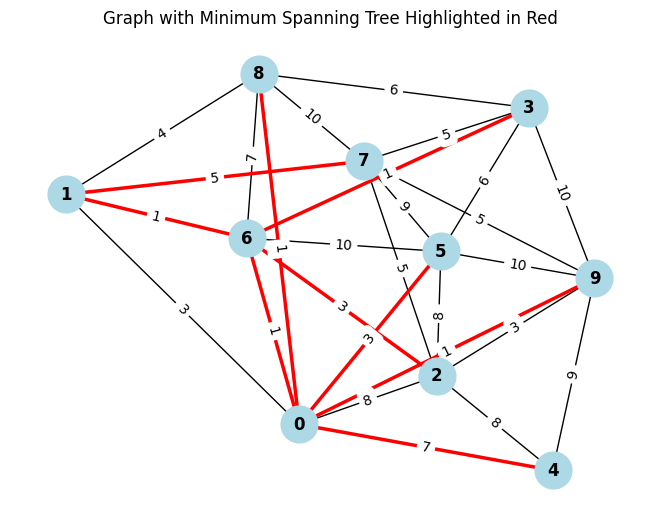

In [58]:
draw_graph_with_mst(random_graph, mst)

In [61]:
# приклад виконання
n = 12  
p = 0.4 
random_graph = RandomWeightedGraph(n, p)

mst, mst_cost, total_time = kruskal(n, random_graph)

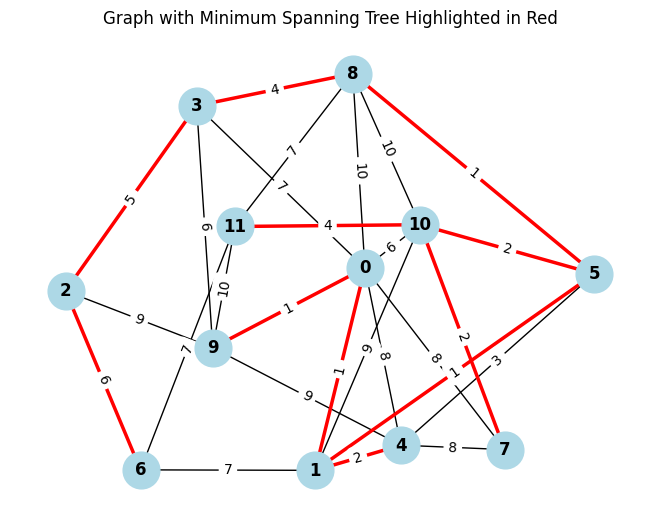

In [62]:
draw_graph_with_mst(random_graph, mst)

In [37]:
def time_kruskal(n, p):
    """Generate a random weighted graph and measure the execution time of Kruskal's algorithm."""
    graph = RandomWeightedGraph(n, p)
    mst, mst_cost, total_time = kruskal(n, graph)
    return total_time


In [53]:
def evaluate_kruskal_time(max_vertices, p, iterations = 1000):
    """Evaluate the execution time of Kruskal's algorithm for different numbers of vertices."""
    vertex_counts = []
    times = []

    for n in range(1, max_vertices + 2, 20):
        vertex_counts.append(n)
        total_time = 0
        
        for _ in range(iterations):
            exec_time = time_kruskal(n, p)  
            total_time += exec_time 
        
        avg_time = total_time / iterations
        times.append(avg_time)


    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(vertex_counts, times, marker='o')
    plt.title("Kruskal's Algorithm Execution Time vs Number of Vertices")
    plt.xlabel("Number of Vertices")
    plt.ylabel("Execution Time (seconds)")
    plt.grid()
    plt.show()

    return vertex_counts, times


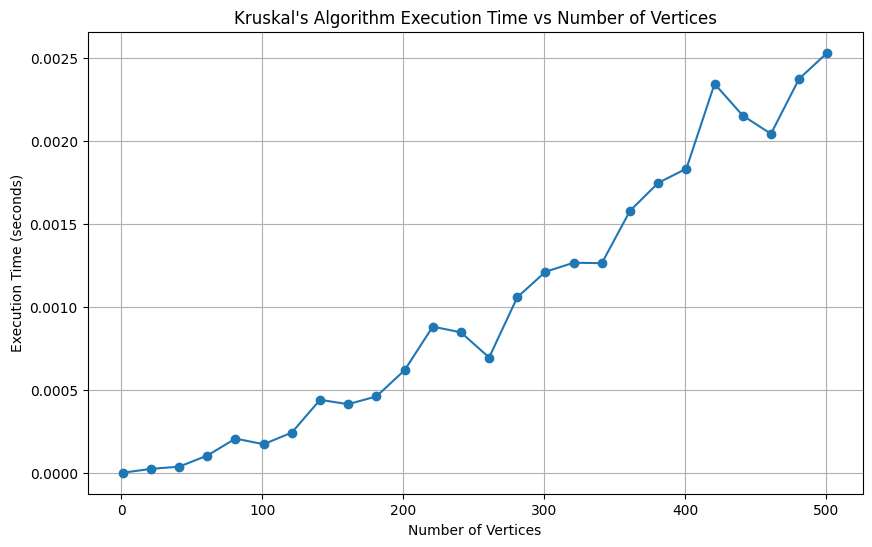

In [54]:
# Example usage:
x1, y1 = evaluate_kruskal_time(max_vertices=500, p=0.7)


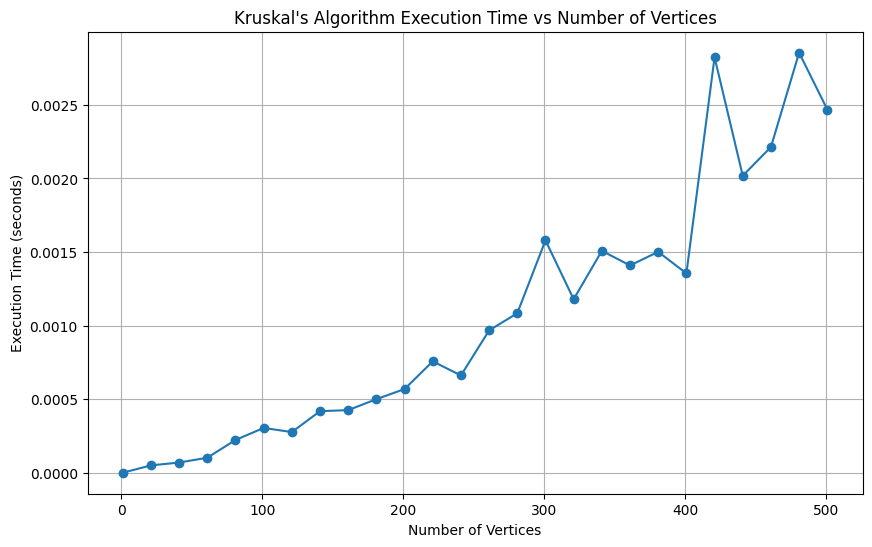

In [65]:
# Example usage:
x2, y2 = evaluate_kruskal_time(max_vertices=500, p=0.5)


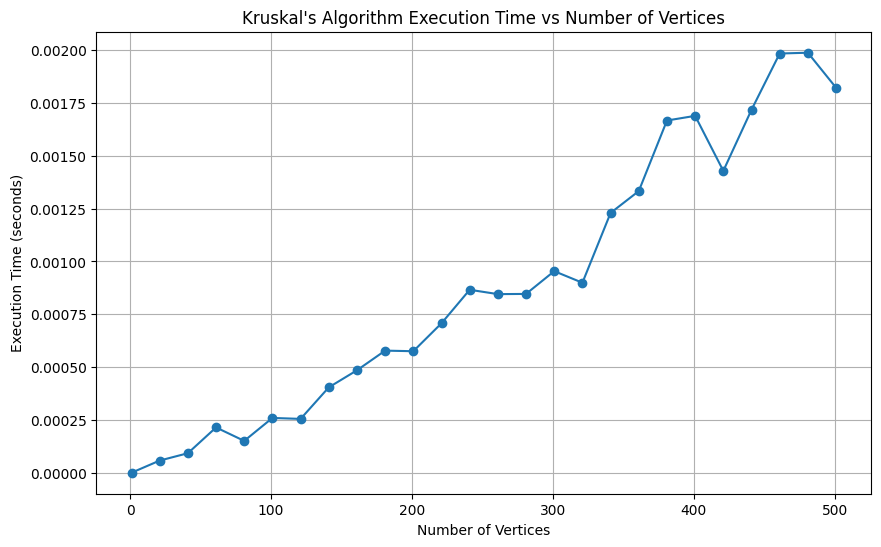

In [64]:
# Example usage:
x3, y3 = evaluate_kruskal_time(max_vertices=500, p=0.2)